In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [2]:
length = 10 # meters 
k = 0.89 # heat capacity 

temp_left = 100 # degrees celcius 
temp_right = 200 # degrees celcius 

total_sim_time = 10

In [6]:
dx=0.1

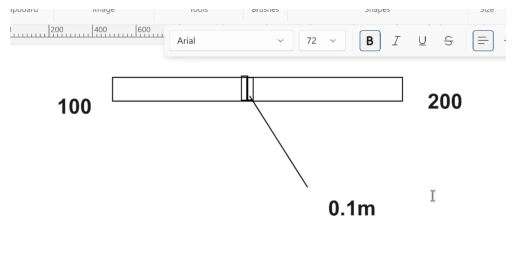

In [ ]:
# Load the image file
image = mpimg.imread('L10 - fig_1.png')

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: remove axes
plt.show()

In [8]:
x_vector = np.linspace(0,length,int(length/dx))
x_vector

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [9]:
dt = 0.0001
t_vector = np.linspace(0,total_sim_time,int(total_sim_time/dt))
t_vector

array([0.00000e+00, 1.00001e-04, 2.00002e-04, ..., 9.99980e+00,
       9.99990e+00, 1.00000e+01])

In [14]:
# u depends on both x and t
# Initial Condition 

u = np.zeros([len(t_vector),len(x_vector)])
u.shape # (time steps,distance steps) = (rows, columns)
u[:,0] = 100 # 1st column = 100
u[:,-1] = 200 # last column = 200
u

# u = [time, distance] returns temp at [time, distance]

array([[100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       ...,
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.]])

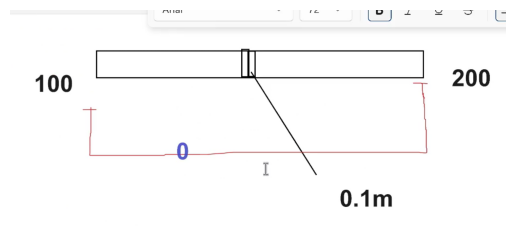

In [12]:
# initial conditon
# left = 100
# right = 200
# in-between = 0
image = mpimg.imread('L10 - fig_2.png')
plt.imshow(image)
plt.axis('off')
plt.show()

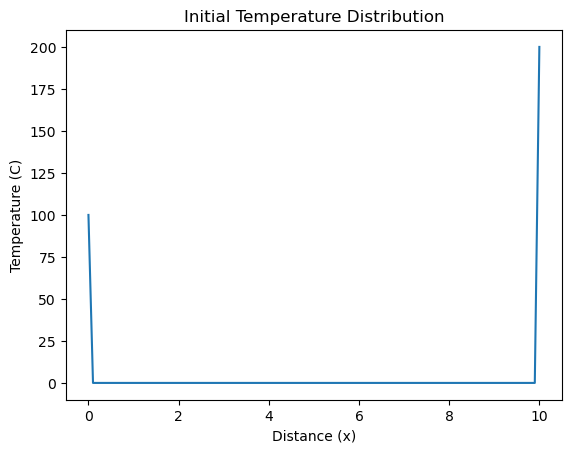

In [21]:
plt.figure()
plt.plot(x_vector,u[0])
plt.title('Initial Temperature Distribution')
plt.xlabel('Distance (x)')
plt.ylabel('Temperature (C)')
plt.show()


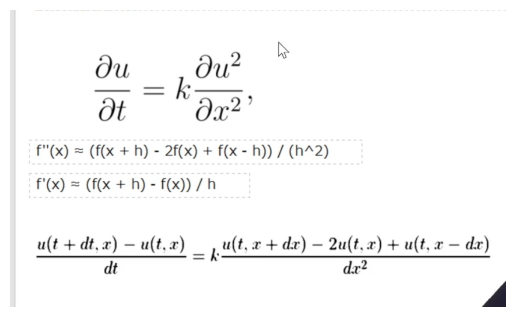

In [23]:
image = mpimg.imread('L10 - fig_3.png')
plt.imshow(image)
plt.axis('off')
plt.show()

Above graphic:
- right side is multiplied by dt and then add u(t,x) to isolated u(t+dt,x) on the left side

Below:
-  t+1 because predicting what will happen in the future (next time step) at x location

In [24]:

for t in range(1, len(t_vector)-1): # -1 because start at 0 last element is -1
    for x in range(1,len(x_vector)-1):
        u[t+1,x] = ((k * (dt/dx**2)) * (u[t,x+1] - 2*u[t,x] + u[t,x-1])) + u[t,x]


In [25]:
u

array([[100.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 200.        ],
       [100.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 200.        ],
       [100.        ,   0.89      ,   0.        , ...,   0.        ,
          1.78      , 200.        ],
       ...,
       [100.        ,  98.59123721,  97.1847561 , ..., 192.92058415,
        196.4589255 , 200.        ],
       [100.        ,  98.59125751,  97.1847967 , ..., 192.92063276,
        196.45894983, 200.        ],
       [100.        ,  98.59127782,  97.1848373 , ..., 192.92068138,
        196.45897415, 200.        ]])

In [26]:
u.shape

(100000, 100)

In [27]:
len(u)

100000

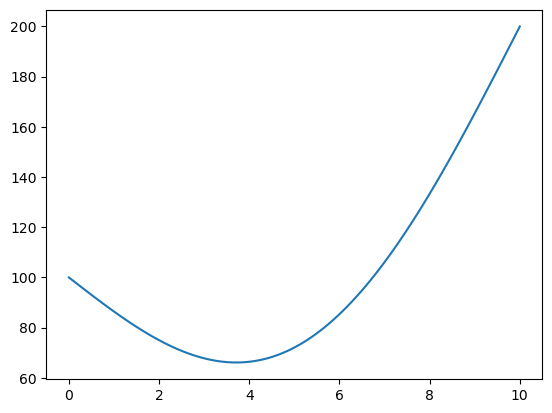

In [30]:
plt.figure()
plt.plot(x_vector,u[-1])
plt.show()